In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import solve_ivp


kwargs = {'linewidth' : 7}

# Define the function f(x)
def f(x):
    return  (x**2 -  3)**2 + 2*x

def differential_eq_1(t, y):
    x, dxdt = y
    ddxdt = - 4*x*(x**2 -3) - 2
    return [dxdt, ddxdt]


In [2]:
x_init = 2.2
max_iterations = 10
mean_duration  = 2.0

#def HD(max_duration, mean_duration, x_init):

t_HD   = np.empty(shape=[0,])
x_HD   = np.empty(shape=[0,])

x      = x_init
t      = 0

for k in range( max_iterations ):

    x0    = x
    dxdt0 = 0
    initial_conditions = [x0, dxdt0]

    duration = np.random.exponential( mean_duration, 1)      # Duration of the flow
    duration = np.squeeze(duration)
    t_span = (0, duration)    
    t_eval  = np.linspace(0, duration, 100)            # Time points where we want the solution
    #    print(t_eval.shape)
    
    sol = solve_ivp(differential_eq_1, t_span, initial_conditions, t_eval=t_eval)

    x_HD_tmp = sol.y[0]
    t_HD_tmp = sol.t 
    t_HD_tmp += t
    
    t_HD = np.append( t_HD, t_HD_tmp )
    x_HD = np.append( x_HD, x_HD_tmp )

    x = x_HD[-1]
    t = t_HD[-1]

#        return x_HD, t_HD

In [3]:
def Chebyroot(k, alpha=1.0, beta=10):
   assert beta > alpha
   a = np.arange(1,k+1)
   return (alpha+beta)/2.0  - (beta-alpha)/2.0*np.cos( (a -0.5)*np.pi / k  )  

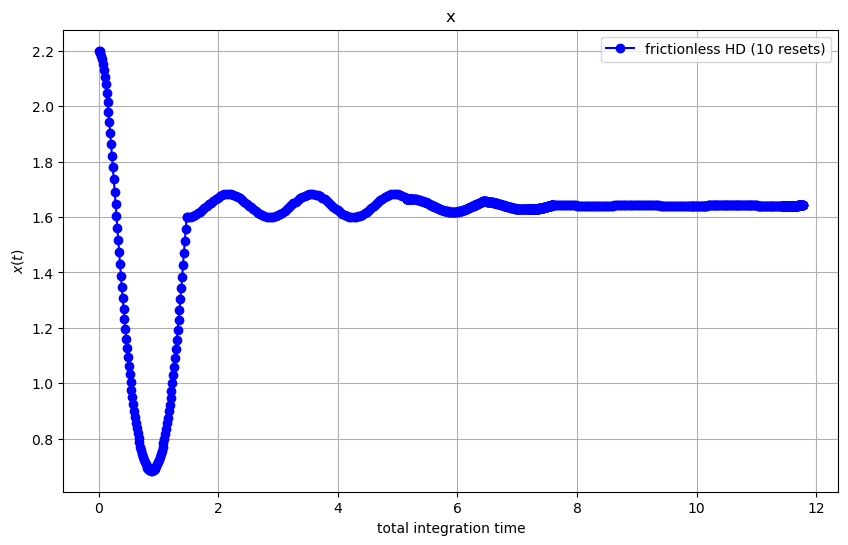

In [4]:
#number_times = 100
#x_init = 3
#max_iterations = 10
#mean_duration  = 10
#success =0

#for n in range(number_times):
#x_HD, t_HD = HD( max_iterations, mean_duration, x_init )
#    if( np.abs( x_HD[-1] + 1.8 ) < 1 ):
#        success += 1

#print("==successful rate === ", success/number_times)
        
plt.figure(figsize=(10, 6))
plt.plot(t_HD, x_HD, '-o', color = 'b', label=r'frictionless HD (10 resets)')

#plt.plot(t_no_reset, x_no_reset_2, '-x', color = 'r', label=r'frictionless HD (no reset)')
#plt.plot(t_HD_a, x_HD_2_a, '-o', color = 'b', label=r'frictionless HD (10 resets)')
#plt.plot(t_HD_b, x_HD_2_b, '-v', color = 'y', label=r'frictionless HD (30 resets)')
#plt.plot(t_GD,  x_GD_2, '-<', color = 'k', label=r'Gradient Flow')
#plt.plot(t_NAG, x_NAG_2, '-1', color = 'c', label=r'NAG Flow')

plt.title(r'x')
plt.xlabel(r'total integration time')
#plt.yscale("log")
plt.ylabel(r'$x(t)$')
plt.grid(True)
plt.legend()
plt.show()


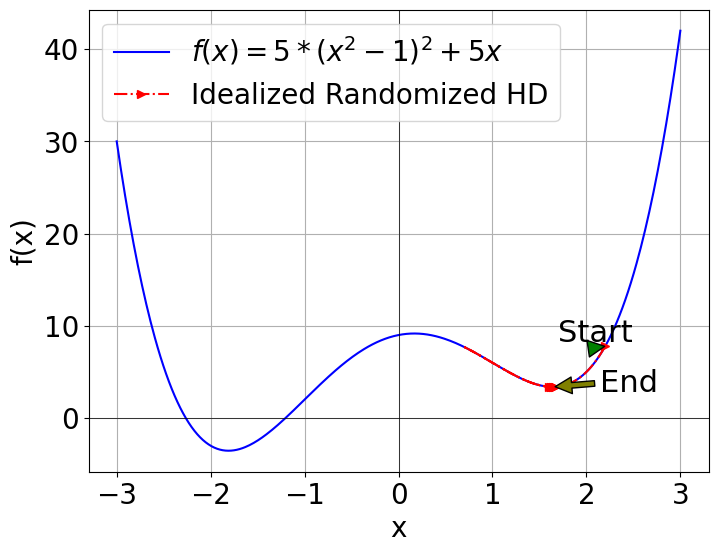

In [5]:
x = np.linspace(-3, 3, 400)
y = f(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$f(x) = 5*(x^2 - 1)^2 + 5x$', color='blue')

plt.plot(x_HD, f(x_HD), '-.>', markevery=100, color = 'r', label=r'Idealized Randomized HD')

plt.annotate('Start',fontsize=22, xy=(x_HD[0], f(x_HD[0]) ), xytext=(x_HD[0]-0.5, f(x_HD[0])+0.5),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate('End',fontsize=22, xy=(x_HD[-1], f(x_HD)[-1] ), xytext=(x_HD[-1]+0.5, f(x_HD[-1])-0.5),
             arrowprops=dict(facecolor='olive', shrink=0.05))


#plt.title('Plot of the function $f(x) = (x^2 - 1)^2$')
plt.xlabel('x',fontsize=20)
plt.ylabel('f(x)',fontsize=20)

plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)

myname = "illustrate2"
hi = myname + ".png"
plt.savefig(hi)
plt.show();

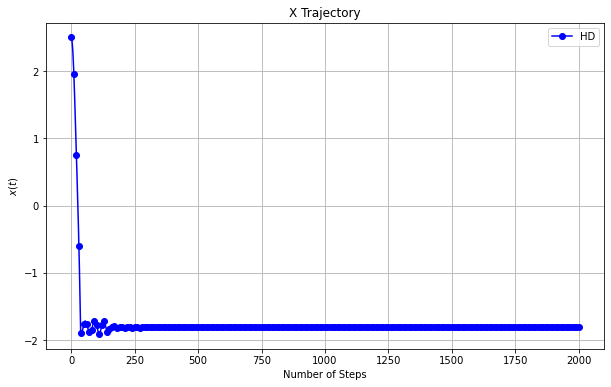

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import copy

from AdaHD_Optimizer import AdaHD, HD

# Define the function f(x)
def f(x):
    return  (x**2 -  3)**2 + 2*x

num_run = 1

x_run = []
for ite in range(num_run):
    
    x = 2.5
    x = torch.tensor(x, requires_grad=True)
    
#     optimizer = HD([x], lr=0.01, mean_duration=0.1, mu=0.0)
    optimizer = AdaHD([x], lr=0.01, betas=(1, 0.999), mean_duration=0.2, mu=0.0)
#     optimizer = torch.optim.Adam([x], lr=0.01, betas=(0.9, 0.999))
#     optimizer = torch.optim.SGD([x], lr=0.01, momentum=0.9, dampening=0.0, nesterov=False)

    x_tra = [copy.deepcopy(x.data)]
    max_iteration = 2000

    for i in range(max_iteration):
        optimizer.zero_grad()
        loss = f(x)
        loss.backward()

    #     x.grad += 1 * torch.randn_like(x)
        optimizer.step()

        x_tra.append(copy.deepcopy(x.data))

    x_tra = torch.stack(x_tra)
    x_run.append(x_tra)

x_run = torch.stack(x_run, dim=0)
x_run_mean = x_run.mean(dim=0)
x_run_std = x_run.std(dim=0)


x_axis = np.arange(max_iteration+1)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, x_run_mean, '-o', markevery=10, color = 'b', label=r'HD')
plt.fill_between(x_axis, x_run_mean+x_run_std, x_run_mean-x_run_std, color='b', alpha=0.2)
plt.title(r'X Trajectory')
plt.xlabel(r'Number of Steps')
plt.ylabel(r'$x(t)$')
plt.grid(True)
plt.legend()

myname = "HD_x_1"
hi = 'pictures/' + myname + ".png"
# plt.savefig(hi)
plt.show()

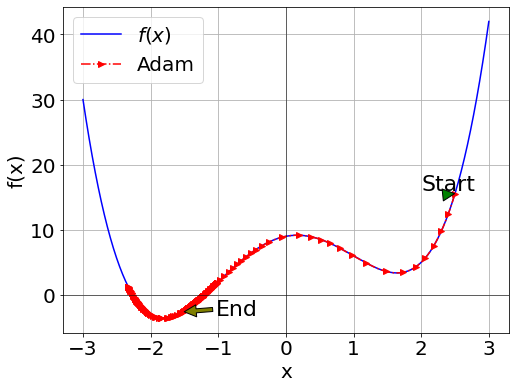

In [45]:
x_range = np.linspace(-3, 3, 400)
y = f(x_range)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_range, y, label=r'$f(x)$', color='blue')

plt.plot(x_tra, f(x_tra), '-.>', markevery=10, color = 'r', label=r'Adam')

plt.annotate('Start',fontsize=22, xy=(x_tra[0], f(x_tra[0]) ), xytext=(x_tra[0]-0.5, f(x_tra[0])+0.5),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate('End',fontsize=22, xy=(x_tra[-1], f(x_tra)[-1] ), xytext=(x_tra[-1]+0.5, f(x_tra[-1])-0.5),
             arrowprops=dict(facecolor='olive', shrink=0.05))


#plt.title('Plot of the function $f(x) = (x^2 - 1)^2$')
plt.xlabel('x',fontsize=20)
plt.ylabel('f(x)',fontsize=20)

plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)

myname = "Adam_0.999"
hi = 'pictures/' + myname + ".png"
plt.savefig(hi)
plt.show();

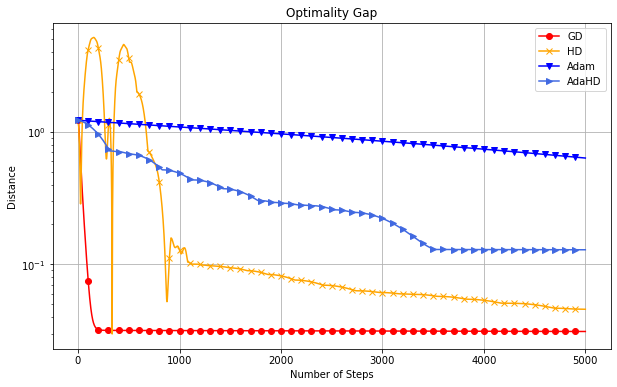

In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import copy

from AdaHD_Optimizer import AdaHD, HD

def loss_function(x):
    return x[0]**4 + 10*(x[1] - x[0]**2)**2


num_run = 10

x_initial = torch.randn(2, requires_grad=True, dtype=torch.double)

dist_run_GD = []
dist_run_GDM = []
dist_run_HD = []
dist_run_AdaHD = []
dist_run_Adam = []

for ite in range(num_run):
    
    x_GD = copy.deepcopy(x_initial)
    x_GDM = copy.deepcopy(x_initial)
    x_HD = copy.deepcopy(x_initial)
    x_Adam = copy.deepcopy(x_initial)
    x_AdaHD = copy.deepcopy(x_initial)
    
    opt_solution = torch.tensor([0.0, 0.0], requires_grad=False, dtype=torch.double)
    
    optimizer_HD = HD([x_HD], lr=0.0001, mean_duration=0.02, mu=0.0)
    optimizer_AdaHD = AdaHD([x_AdaHD], lr=0.0001, betas=(1, 0.999), mean_duration=0.02, mu=0.0)
    optimizer_Adam = torch.optim.Adam([x_Adam], lr=0.0001, betas=(0.9, 0.999))
    optimizer_GDM = torch.optim.SGD([x_GD], lr=0.0001, momentum=0.9, dampening=0.0, nesterov=False)
    optimizer_GD = torch.optim.SGD([x_GD], lr=0.0001, momentum=0.0, dampening=0.0, nesterov=False)

    dist_tra_GD = []
    dist_tra_GDM = []
    dist_tra_HD = []
    dist_tra_Adam = []
    dist_tra_AdaHD = []
    
    max_iteration = 5000

    for i in range(max_iteration):
        
        dist_tra_GD.append(torch.norm(x_GD.data - opt_solution))
        optimizer_GD.zero_grad()
        loss = loss_function(x_GD)
        loss.backward()
        optimizer_GD.step()
        
        dist_tra_GDM.append(torch.norm(x_GDM.data - opt_solution))
        optimizer_GDM.zero_grad()
        loss = loss_function(x_GDM)
        loss.backward()
        optimizer_GDM.step()
        
        dist_tra_HD.append(torch.norm(x_HD.data - opt_solution))
        optimizer_HD.zero_grad()
        loss = loss_function(x_HD)
        loss.backward()
        optimizer_HD.step()
        
        dist_tra_Adam.append(torch.norm(x_Adam.data - opt_solution))
        optimizer_Adam.zero_grad()
        loss = loss_function(x_Adam)
        loss.backward()
        optimizer_Adam.step()
        
        dist_tra_AdaHD.append(torch.norm(x_AdaHD.data - opt_solution))
        optimizer_AdaHD.zero_grad()
        loss = loss_function(x_AdaHD)
        loss.backward()
        optimizer_AdaHD.step()

        

    dist_tra_GD = torch.stack(dist_tra_GD)
    dist_run_GD.append(dist_tra_GD)
    
    dist_tra_HD = torch.stack(dist_tra_HD)
    dist_run_HD.append(dist_tra_HD)
    
    dist_tra_Adam = torch.stack(dist_tra_Adam)
    dist_run_Adam.append(dist_tra_Adam)
    
    dist_tra_AdaHD = torch.stack(dist_tra_AdaHD)
    dist_run_AdaHD.append(dist_tra_AdaHD)

dist_run_GD = torch.stack(dist_run_GD, dim=0)
dist_run_mean_GD = dist_run_GD.mean(dim=0)
dist_run_std_GD = dist_run_GD.std(dim=0)

dist_run_HD = torch.stack(dist_run_HD, dim=0)
dist_run_mean_HD = dist_run_HD.mean(dim=0)
dist_run_std_HD = dist_run_HD.std(dim=0)

dist_run_Adam = torch.stack(dist_run_Adam, dim=0)
dist_run_mean_Adam = dist_run_Adam.mean(dim=0)
dist_run_std_Adam = dist_run_Adam.std(dim=0)

dist_run_AdaHD = torch.stack(dist_run_AdaHD, dim=0)
dist_run_mean_AdaHD = dist_run_AdaHD.mean(dim=0)
dist_run_std_AdaHD = dist_run_AdaHD.std(dim=0)

x_axis = list(range(max_iteration))

plt.figure(figsize=(10, 6))
plt.plot(x_axis, dist_run_mean_GD, '-o', markevery=100, color = 'red', label=r'GDM')
plt.plot(x_axis, dist_run_mean_HD, '-x', markevery=100, color = 'orange', label=r'HD')
plt.plot(x_axis, dist_run_mean_Adam, '-v', markevery=100, color = 'b', label=r'Adam')
plt.plot(x_axis, dist_run_mean_AdaHD, '->', markevery=100, color = 'royalblue', label=r'AdaHD')
plt.fill_between(x_axis, dist_run_mean_GD+dist_run_std_GD, dist_run_mean_GD-dist_run_std_GD, color='red', alpha=0.2)
plt.fill_between(x_axis, dist_run_mean_HD+dist_run_std_HD, dist_run_mean_HD-dist_run_std_HD, color='orange', alpha=0.2)
# plt.fill_between(x_axis, dist_run_mean_Adam+dist_run_std_Adam, dist_run_mean_Adam-dist_run_std_Adam, color='blue', alpha=0.2)
# plt.fill_between(x_axis, dist_run_mean_AdaHD+dist_run_std_AdaHD, dist_run_mean_AdaHD-dist_run_std_AdaHD, color='royalblue', alpha=0.2)
plt.title(r'Optimality Gap')
plt.xlabel(r'Number of Steps')
plt.ylabel(r'Distance')
plt.yscale('log')
plt.grid(True)
plt.legend()

myname = "Experiment1_c"
hi = 'pictures/' + myname + ".png"
# plt.savefig(hi)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


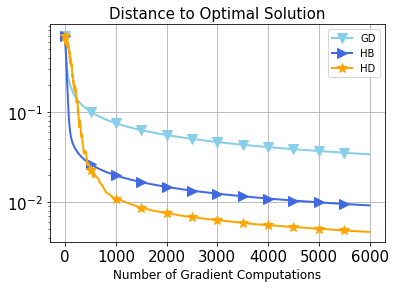

In [14]:
# Import necessary functions and modules
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from src.GDPolyak import run_gdpolyak_algorithm
from src.utils import plot_gdpolyak_results
import copy
from AdaHD_Optimizer import AdaHD, HD

# Define the quadratic sensing problem parameters
RANK_SOLUTION = 2
RANK_FACTORIZATION = 4
DIMENSION = 100
NB_MEASUREMENTS = 1000
SEED = 3407

def generate_problem_instance():
    """Generate the problem instance for quadratic sensing."""
    torch.manual_seed(SEED)
    ground_truth = torch.randn(DIMENSION, RANK_SOLUTION, dtype=torch.double)
    ground_truth = ground_truth / ground_truth.norm()
    padded_ground_truth = torch.zeros(DIMENSION, RANK_FACTORIZATION, dtype=torch.double)
    padded_ground_truth[:, :RANK_SOLUTION] = ground_truth
    
    x = torch.randn(RANK_FACTORIZATION * DIMENSION, dtype=torch.double)
    x = x / torch.norm(x)
    x.requires_grad = True
    
    A = torch.randn(NB_MEASUREMENTS, DIMENSION, dtype=torch.double)
    B = torch.randn(NB_MEASUREMENTS, DIMENSION, dtype=torch.double)
    y = torch.sum((A @ padded_ground_truth)**2, dim=1) - torch.sum((B @ padded_ground_truth)**2, dim=1)
    
    return padded_ground_truth, x, A, B, y

def loss_function(x, A, B, y):
    """Compute the loss function for quadratic sensing."""
    x_matrix = x.view(DIMENSION, RANK_FACTORIZATION)
    return F.mse_loss(torch.sum((A @ x_matrix)**2, dim=1) - torch.sum((B @ x_matrix)**2, dim=1), y)

def procrustes_distance(x, ground_truth):
    """Compute the Procrustes distance between x and ground_truth."""
    x_matrix = x.view(DIMENSION, RANK_FACTORIZATION)
    U1, _, V1 = torch.svd(x_matrix)
    U2, _, V2 = torch.svd(ground_truth)
    R = U1 @ U2.t()
    R2 = V2 @ V1.t()
    return torch.norm(x_matrix - R @ ground_truth @ R2, 'fro')


ground_truth, x, A, B, y = generate_problem_instance()

num_run = 10

dist_run_GD = []
dist_run_GDM = []
dist_run_HD = []
dist_run_AdaHD = []
dist_run_Adam = []

for ite in range(num_run):
    
    x_GD = copy.deepcopy(x)
    x_GDM = copy.deepcopy(x)
    x_HD = copy.deepcopy(x)
    x_Adam = copy.deepcopy(x)
    x_AdaHD = copy.deepcopy(x)
    
    optimizer_HD = HD([x_HD], lr=0.05, mean_duration=2, mu=0.0)
#     optimizer_HD1
    optimizer_GD = torch.optim.SGD([x_GD], lr=0.05, momentum=0.0, dampening=0.0, nesterov=False)
    optimizer_GDM = torch.optim.SGD([x_GDM], lr=0.05, momentum=0.9, dampening=0.0, nesterov=False)

    dist_tra_GD = []
    dist_tra_GDM = []
    dist_tra_HD = []
    dist_tra_Adam = []
    dist_tra_AdaHD = []
    
    max_iteration = 6000

    for i in range(max_iteration):
        
        dist_tra_GD.append(procrustes_distance(x_GD.data, ground_truth))
        optimizer_GD.zero_grad()
        loss = loss_function(x_GD, A, B, y)
        loss.backward()
        optimizer_GD.step()
        
        dist_tra_GDM.append(procrustes_distance(x_GDM.data, ground_truth))
        optimizer_GDM.zero_grad()
        loss = loss_function(x_GDM, A, B, y)
        loss.backward()
        optimizer_GDM.step()
        
        dist_tra_HD.append(procrustes_distance(x_HD.data, ground_truth))
        optimizer_HD.zero_grad()
        loss = loss_function(x_HD, A, B, y)
        loss.backward()
        optimizer_HD.step()
        
#         dist_tra_Adam.append(procrustes_distance(x_Adam.data, ground_truth))
#         optimizer_Adam.zero_grad()
#         loss = loss_function(x_Adam, A, B, y)
#         loss.backward()
#         optimizer_Adam.step()
        
#         dist_tra_AdaHD.append(procrustes_distance(x_AdaHD.data, ground_truth))
#         optimizer_AdaHD.zero_grad()
#         loss = loss_function(x_AdaHD, A, B, y)
#         loss.backward()
#         optimizer_AdaHD.step()

        

    dist_tra_GD = torch.stack(dist_tra_GD)
    dist_run_GD.append(dist_tra_GD)
    
    dist_tra_GDM = torch.stack(dist_tra_GDM)
    dist_run_GDM.append(dist_tra_GDM)
    
    dist_tra_HD = torch.stack(dist_tra_HD)
    dist_run_HD.append(dist_tra_HD)
    
#     dist_tra_Adam = torch.stack(dist_tra_Adam)
#     dist_run_Adam.append(dist_tra_Adam)
    
#     dist_tra_AdaHD = torch.stack(dist_tra_AdaHD)
#     dist_run_AdaHD.append(dist_tra_AdaHD)

dist_run_GD = torch.stack(dist_run_GD, dim=0)
dist_run_mean_GD = dist_run_GD.mean(dim=0)
dist_run_std_GD = dist_run_GD.std(dim=0)

dist_run_GDM = torch.stack(dist_run_GDM, dim=0)
dist_run_mean_GDM = dist_run_GDM.mean(dim=0)
dist_run_std_GDM = dist_run_GDM.std(dim=0)

dist_run_HD = torch.stack(dist_run_HD, dim=0)
dist_run_mean_HD = dist_run_HD.mean(dim=0)
dist_run_std_HD = dist_run_HD.std(dim=0)

# dist_run_Adam = torch.stack(dist_run_Adam, dim=0)
# dist_run_mean_Adam = dist_run_Adam.mean(dim=0)
# dist_run_std_Adam = dist_run_Adam.std(dim=0)

# dist_run_AdaHD = torch.stack(dist_run_AdaHD, dim=0)
# dist_run_mean_AdaHD = dist_run_AdaHD.mean(dim=0)
# dist_run_std_AdaHD = dist_run_AdaHD.std(dim=0)

x_axis = list(range(max_iteration))

plt.figure()
plt.plot(x_axis, dist_run_mean_GD, '-v', linewidth=2, markevery=500, markersize=10, color = 'skyblue', label=r'GD')
plt.plot(x_axis, dist_run_mean_GDM, '->', linewidth=2, markevery=500, markersize=10, color = 'royalblue', label=r'HB')
plt.plot(x_axis, dist_run_mean_HD, '-*', linewidth=2, markevery=500, markersize=10, color = 'orange', label=r'HD')
# plt.fill_between(x_axis, dist_run_mean_GD+dist_run_std_GD, dist_run_mean_GD-dist_run_std_GD, color='skyblue', alpha=0.2)
# plt.fill_between(x_axis, dist_run_mean_GDM+dist_run_std_GDM, dist_run_mean_GDM-dist_run_std_GDM, color='royalblue', alpha=0.2)
# plt.fill_between(x_axis, dist_run_mean_HD+dist_run_std_HD, dist_run_mean_HD-dist_run_std_HD, color='orange', alpha=0.2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'Distance to Optimal Solution', fontsize=15)
plt.xlabel(r'Number of Gradient Computations', fontsize=12)
# plt.ylabel(r'Distance to Optimal Solution', fontsize=15)
plt.yscale('log')
plt.grid(True)
plt.legend()

myname = "matrix_sensing_algo"
hi = 'pictures/' + myname + ".eps"
plt.savefig(hi)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


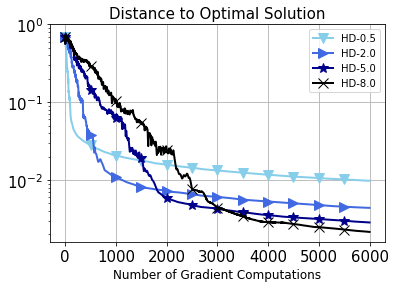

In [13]:
# Import necessary functions and modules
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from src.GDPolyak import run_gdpolyak_algorithm
from src.utils import plot_gdpolyak_results
import copy
from AdaHD_Optimizer import AdaHD, HD

# Define the quadratic sensing problem parameters
RANK_SOLUTION = 2
RANK_FACTORIZATION = 4
DIMENSION = 100
NB_MEASUREMENTS = 1000
SEED = 3407

def generate_problem_instance():
    """Generate the problem instance for quadratic sensing."""
    torch.manual_seed(SEED)
    ground_truth = torch.randn(DIMENSION, RANK_SOLUTION, dtype=torch.double)
    ground_truth = ground_truth / ground_truth.norm()
    padded_ground_truth = torch.zeros(DIMENSION, RANK_FACTORIZATION, dtype=torch.double)
    padded_ground_truth[:, :RANK_SOLUTION] = ground_truth
    
    x = torch.randn(RANK_FACTORIZATION * DIMENSION, dtype=torch.double)
    x = x / torch.norm(x)
    x.requires_grad = True
    
    A = torch.randn(NB_MEASUREMENTS, DIMENSION, dtype=torch.double)
    B = torch.randn(NB_MEASUREMENTS, DIMENSION, dtype=torch.double)
    y = torch.sum((A @ padded_ground_truth)**2, dim=1) - torch.sum((B @ padded_ground_truth)**2, dim=1)
    
    return padded_ground_truth, x, A, B, y

def loss_function(x, A, B, y):
    """Compute the loss function for quadratic sensing."""
    x_matrix = x.view(DIMENSION, RANK_FACTORIZATION)
    return F.mse_loss(torch.sum((A @ x_matrix)**2, dim=1) - torch.sum((B @ x_matrix)**2, dim=1), y)

def procrustes_distance(x, ground_truth):
    """Compute the Procrustes distance between x and ground_truth."""
    x_matrix = x.view(DIMENSION, RANK_FACTORIZATION)
    U1, _, V1 = torch.svd(x_matrix)
    U2, _, V2 = torch.svd(ground_truth)
    R = U1 @ U2.t()
    R2 = V2 @ V1.t()
    return torch.norm(x_matrix - R @ ground_truth @ R2, 'fro')


ground_truth, x, A, B, y = generate_problem_instance()

num_run = 10

dist_run_HD1 = []
dist_run_HD2 = []
dist_run_HD3 = []
dist_run_HD4 = []

for ite in range(num_run):
    
    x_HD1 = copy.deepcopy(x)
    x_HD2 = copy.deepcopy(x)
    x_HD3 = copy.deepcopy(x)
    x_HD4 = copy.deepcopy(x)
    
    optimizer_HD1 = HD([x_HD1], lr=0.05, mean_duration=0.5, mu=0.0)
    optimizer_HD2 = HD([x_HD2], lr=0.05, mean_duration=2, mu=0.0)
    optimizer_HD3 = HD([x_HD3], lr=0.05, mean_duration=5, mu=0.0)
    optimizer_HD4 = HD([x_HD4], lr=0.05, mean_duration=8, mu=0.0)

    dist_tra_HD1 = []
    dist_tra_HD2 = []
    dist_tra_HD3 = []
    dist_tra_HD4 = []
    
    max_iteration = 6000

    for i in range(max_iteration):
        
        dist_tra_HD1.append(procrustes_distance(x_HD1.data, ground_truth))
        optimizer_HD1.zero_grad()
        loss = loss_function(x_HD1, A, B, y)
        loss.backward()
        optimizer_HD1.step()
        
        dist_tra_HD2.append(procrustes_distance(x_HD2.data, ground_truth))
        optimizer_HD2.zero_grad()
        loss = loss_function(x_HD2, A, B, y)
        loss.backward()
        optimizer_HD2.step()
        
        dist_tra_HD3.append(procrustes_distance(x_HD3.data, ground_truth))
        optimizer_HD3.zero_grad()
        loss = loss_function(x_HD3, A, B, y)
        loss.backward()
        optimizer_HD3.step()
        
        dist_tra_HD4.append(procrustes_distance(x_HD4.data, ground_truth))
        optimizer_HD4.zero_grad()
        loss = loss_function(x_HD4, A, B, y)
        loss.backward()
        optimizer_HD4.step()
        
#         dist_tra_Adam.append(procrustes_distance(x_Adam.data, ground_truth))
#         optimizer_Adam.zero_grad()
#         loss = loss_function(x_Adam, A, B, y)
#         loss.backward()
#         optimizer_Adam.step()
        
#         dist_tra_AdaHD.append(procrustes_distance(x_AdaHD.data, ground_truth))
#         optimizer_AdaHD.zero_grad()
#         loss = loss_function(x_AdaHD, A, B, y)
#         loss.backward()
#         optimizer_AdaHD.step()

    
    dist_tra_HD1 = torch.stack(dist_tra_HD1)
    dist_run_HD1.append(dist_tra_HD1)
    
    dist_tra_HD2 = torch.stack(dist_tra_HD2)
    dist_run_HD2.append(dist_tra_HD2)
    
    dist_tra_HD3 = torch.stack(dist_tra_HD3)
    dist_run_HD3.append(dist_tra_HD3)
    
    dist_tra_HD4 = torch.stack(dist_tra_HD4)
    dist_run_HD4.append(dist_tra_HD4)
    
#     dist_tra_Adam = torch.stack(dist_tra_Adam)
#     dist_run_Adam.append(dist_tra_Adam)
    
#     dist_tra_AdaHD = torch.stack(dist_tra_AdaHD)
#     dist_run_AdaHD.append(dist_tra_AdaHD)

dist_run_HD1 = torch.stack(dist_run_HD1, dim=0)
dist_run_mean_HD1 = dist_run_HD1.mean(dim=0)
dist_run_std_HD1 = dist_run_HD1.std(dim=0)

dist_run_HD2 = torch.stack(dist_run_HD2, dim=0)
dist_run_mean_HD2 = dist_run_HD2.mean(dim=0)
dist_run_std_HD2 = dist_run_HD2.std(dim=0)

dist_run_HD3 = torch.stack(dist_run_HD3, dim=0)
dist_run_mean_HD3 = dist_run_HD3.mean(dim=0)
dist_run_std_HD3 = dist_run_HD3.std(dim=0)

dist_run_HD4 = torch.stack(dist_run_HD4, dim=0)
dist_run_mean_HD4 = dist_run_HD4.mean(dim=0)
dist_run_std_HD4 = dist_run_HD4.std(dim=0)

x_axis = list(range(max_iteration))

plt.figure()
plt.plot(x_axis, dist_run_mean_HD1, '-v', linewidth=2, markevery=500, markersize=10, color = 'skyblue', label=r'HD-0.5')
plt.plot(x_axis, dist_run_mean_HD2, '->', linewidth=2, markevery=500, markersize=10, color = 'royalblue', label=r'HD-2.0')
plt.plot(x_axis, dist_run_mean_HD3, '-*', linewidth=2, markevery=500, markersize=10, color = 'darkblue', label=r'HD-5.0')
plt.plot(x_axis, dist_run_mean_HD4, '-x', linewidth=2, markevery=500, markersize=10, color = 'black', label=r'HD-8.0')
# plt.fill_between(x_axis, dist_run_mean_GD+dist_run_std_GD, dist_run_mean_GD-dist_run_std_GD, color='skyblue', alpha=0.2)
# plt.fill_between(x_axis, dist_run_mean_GDM+dist_run_std_GDM, dist_run_mean_GDM-dist_run_std_GDM, color='royalblue', alpha=0.2)
# plt.fill_between(x_axis, dist_run_mean_HD+dist_run_std_HD, dist_run_mean_HD-dist_run_std_HD, color='orange', alpha=0.2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'Distance to Optimal Solution', fontsize=15)
plt.xlabel(r'Number of Gradient Computations', fontsize=12)
# plt.ylabel(r'Distance to Optimal Solution', fontsize=15)
plt.yscale('log')
plt.grid(True)
plt.legend()

myname = "matrix_sensing_duration"
hi = 'pictures/' + myname + ".eps"
plt.savefig(hi)
plt.show()